# Exploratory Data Analysis

In this EAD section, I will use the pre-processed data to find some insights about the hotel's customers and its business. 

Here are some questions to analyze with.
- Which hotel is more demanding
- Where do the guests come from?
- How much do guests pay for a room per night?
- How does the price per night vary over the year?
- In which month, do the hotels have the highest room reservation
- Bookings by market segment
- Which hotel has the higher cancelation rate
- Which month have the highest number of cancelations?

In [86]:
# Load all packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Load the data

In [87]:
hotel = pd.read_csv('D:\Jupyter_Notebook\Hotel_Demand\data\hotel_cleaned.csv')

In [88]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_status_date_datetime,arrival_datetime
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No company,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No company,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No company,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No company,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No company,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-03,2015-07-01


In [89]:
hotel.dtypes

hotel                                object
is_canceled                           int64
lead_time                             int64
arrival_date_year                     int64
arrival_date_month                   object
arrival_date_week_number              int64
arrival_date_day_of_month             int64
stays_in_weekend_nights               int64
stays_in_week_nights                  int64
adults                                int64
children                              int64
babies                                int64
meal                                 object
country                              object
market_segment                       object
distribution_channel                 object
is_repeated_guest                     int64
previous_cancellations                int64
previous_bookings_not_canceled        int64
reserved_room_type                   object
assigned_room_type                   object
booking_changes                       int64
deposit_type                    

In [90]:
hotel.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119208.0,0.370764,0.483011,0.0,0.0,0.00,1.0,1.0
lead_time,119208.0,104.109045,106.875835,0.0,18.0,69.00,161.0,737.0
arrival_date_year,119208.0,2016.156466,0.707487,2015.0,2016.0,2016.00,2017.0,2017.0
arrival_date_week_number,119208.0,27.163638,13.601068,1.0,16.0,28.00,38.0,53.0
arrival_date_day_of_month,119208.0,15.798730,8.781048,1.0,8.0,16.00,23.0,31.0
stays_in_weekend_nights,119208.0,0.927035,0.995082,0.0,0.0,1.00,2.0,19.0
stays_in_week_nights,119208.0,2.499178,1.897090,0.0,1.0,2.00,3.0,50.0
adults,119208.0,1.859204,0.575190,0.0,2.0,2.00,2.0,55.0
children,119208.0,0.104045,0.398839,0.0,0.0,0.00,0.0,10.0
babies,119208.0,0.007961,0.097510,0.0,0.0,0.00,0.0,10.0


In [91]:
hotel.describe(include=['object', 'category']).T

,count,unique,top,freq
hotel,119208,2,City Hotel,79162
arrival_date_month,119208,12,August,13861
meal,119208,5,BB,92234
country,119208,178,PRT,48482
market_segment,119208,8,Online TA,56408
distribution_channel,119208,5,TA/TO,97749
reserved_room_type,119208,9,A,85871
assigned_room_type,119208,11,A,74019
deposit_type,119208,3,No Deposit,104460
agent,119208,334,9.0,31922


#### Check the overall data information

D:\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
D:\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
D:\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
D:\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning

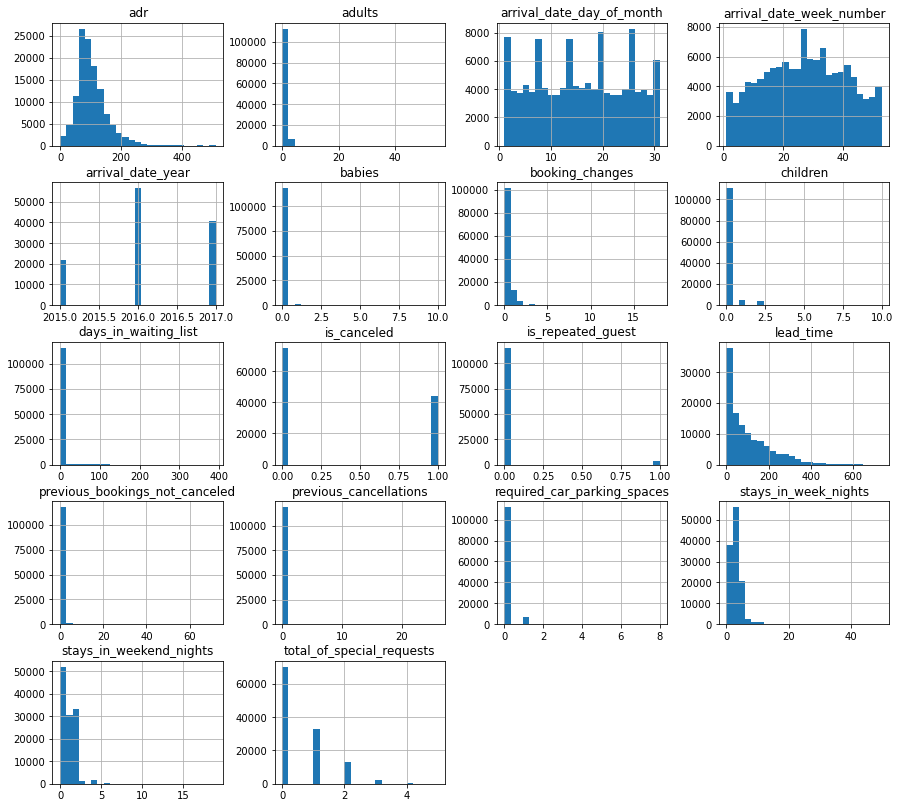

In [198]:
# Histgrams of all numerical data
all_hist = hotel.hist(bins=25,figsize=(15,14))

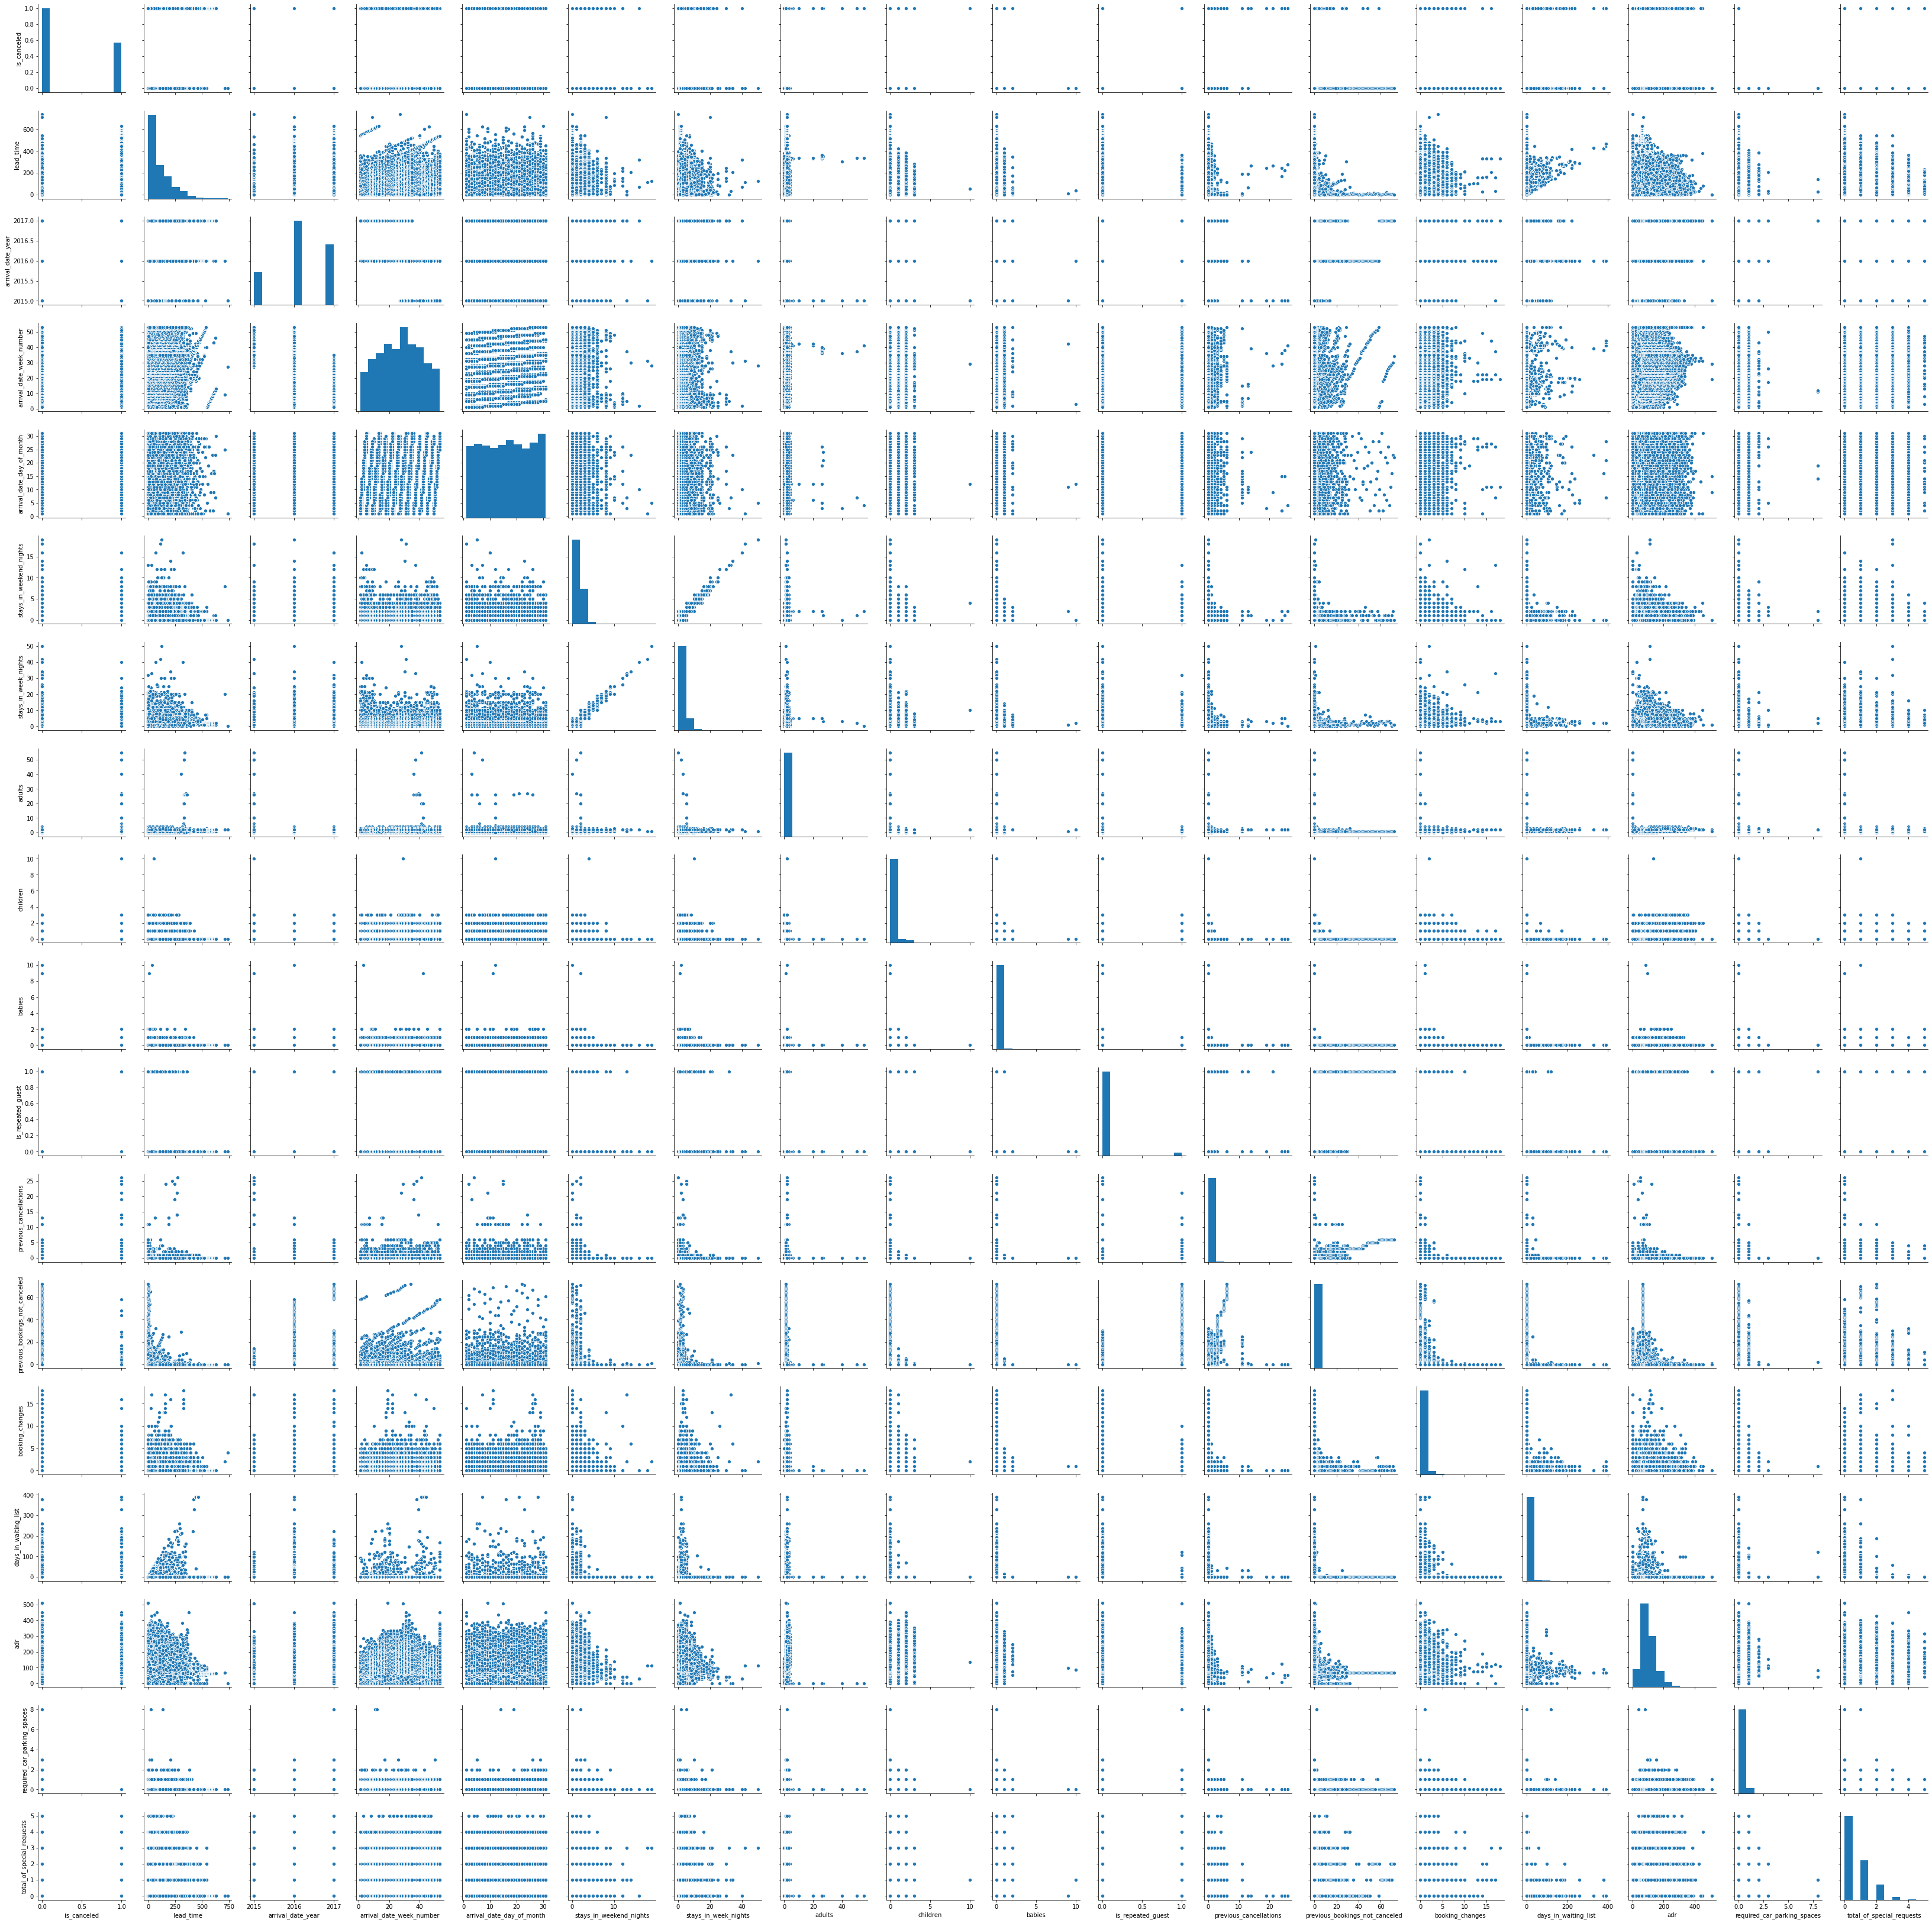

In [199]:
# Pair plot of all numerical data
sns.pairplot(hotel)

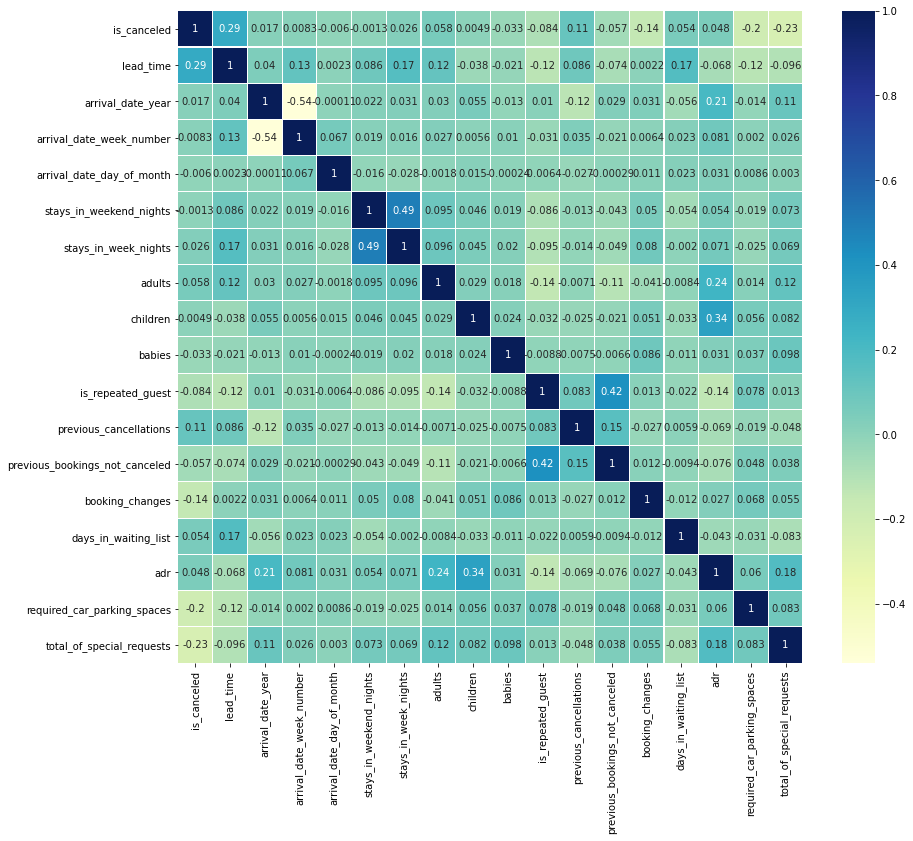

In [9]:
# Make a heatmap of the data 
plt.figure(figsize=(14,12))
sns.heatmap(hotel.corr(),linewidths=.1,cmap="YlGnBu", annot=True)

### EDA

#### Which hotel is more demanding

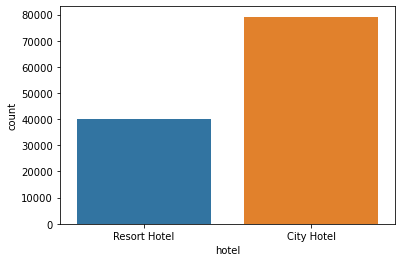

In [91]:
hotel_demand = sns.countplot(x='hotel',data=hotel)

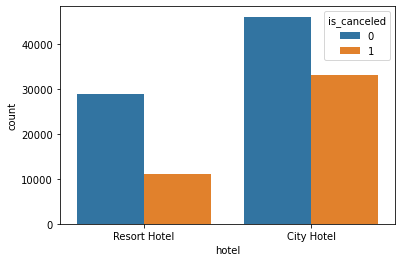

In [93]:
sns.countplot(x='hotel',data=hotel,hue='is_canceled')

The city hotel is more demanding, but it also has more cancellation.

#### Where do the guests come from?

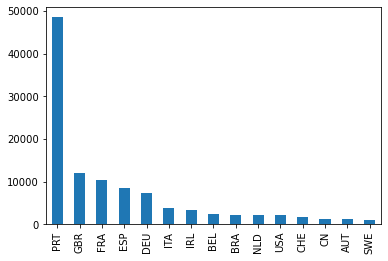

In [92]:
# Make a barplot to have an overall idea about the country
country_order = hotel['country'].value_counts().head(15).plot(kind = 'bar')

Most customers are from Europe, like Portugal, United Kingdom, France and Spain.

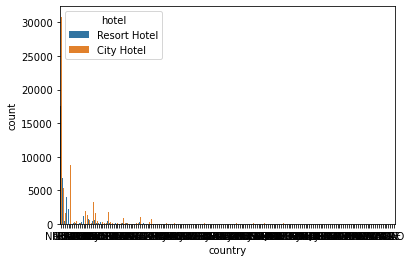

In [93]:
# See if there are any difference between hotels.
sns.countplot(x='country',hue = 'hotel',data = hotel)

This plot is too crowd that is not so useful.I will only plot the first most frequent 15 countries

In [126]:
ch_country = hotel[hotel['hotel']=='City Hotel']['country'].value_counts()
ch_country_percent = hotel[hotel['hotel']=='City Hotel']['country'].value_counts(normalize = True)
ch_country = pd.DataFrame({'Country':ch_country.index,'City_Hotel_Count':ch_country.values,'City_Hotel_Percent':ch_country_percent})
ch_country.head(15)

,Country,City_Hotel_Count,City_Hotel_Percent
PRT,PRT,30860,0.389834
FRA,FRA,8791,0.111051
DEU,DEU,6082,0.076830
GBR,GBR,5307,0.067040
ESP,ESP,4604,0.058159
ITA,ITA,3302,0.041712
BEL,BEL,1894,0.023926
BRA,BRA,1792,0.022637
USA,USA,1614,0.020389
NLD,NLD,1589,0.020073


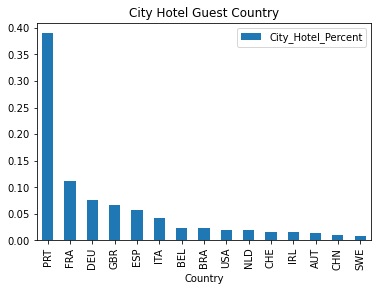

In [127]:
_ = ch_country.head(15).plot(x='Country',y='City_Hotel_Percent',kind='bar')
_ = plt.title('City Hotel Guest Country')

In [134]:
rh_country = hotel[hotel['hotel']=='Resort Hotel']['country'].value_counts()
rh_country_percent = hotel[hotel['hotel']=='Resort Hotel']['country'].value_counts(normalize = True)
rh_country = pd.DataFrame({'Country':rh_country.index,'Resort_Hotel_Count':rh_country.values,'Resort_Hotel_Percent':rh_country_percent.values})
rh_country.head(15)

,Country,Resort_Hotel_Count,Resort_Hotel_Percent
0,PRT,17622,0.440044
1,GBR,6812,0.170104
2,ESP,3956,0.098786
3,IRL,2166,0.054088
4,FRA,1610,0.040204
5,DEU,1203,0.030040
6,CN,710,0.017730
7,NLD,514,0.012835
8,USA,479,0.011961
9,No country,462,0.011537


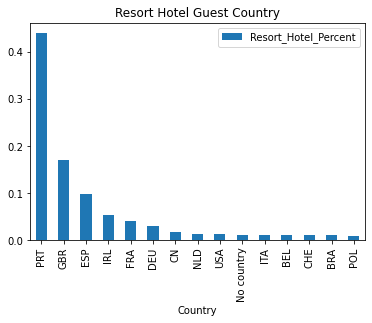

In [142]:
ax = rh_country.head(15).plot(x='Country',y='Resort_Hotel_Percent',kind='bar')
ax = plt.title('Resort Hotel Guest Country')

Notice here, there are 462 reservations (0.011537%) labeled as no country. Resort Hotel's customers might not want to reveal where they come from.

In [145]:
country = pd.merge(ch_country,rh_country, how='outer', on='Country')
country['total'] = country['Resort_Hotel_Count']+country['Resort_Hotel_Count']
country = country.sort_values(by='total', ascending=False)
country15 = country.head(15)
country15

,Country,City_Hotel_Count,City_Hotel_Percent,Resort_Hotel_Count,Resort_Hotel_Percent,total
0,PRT,30860.0,0.389834,17622.0,0.440044,35244.0
3,GBR,5307.0,0.067040,6812.0,0.170104,13624.0
4,ESP,4604.0,0.058159,3956.0,0.098786,7912.0
11,IRL,1208.0,0.015260,2166.0,0.054088,4332.0
1,FRA,8791.0,0.111051,1610.0,0.040204,3220.0
2,DEU,6082.0,0.076830,1203.0,0.030040,2406.0
17,CN,569.0,0.007188,710.0,0.017730,1420.0
9,NLD,1589.0,0.020073,514.0,0.012835,1028.0
8,USA,1614.0,0.020389,479.0,0.011961,958.0
75,No country,16.0,0.000202,462.0,0.011537,924.0


Text(0.5, 1.0, 'Hotel Guest Country Count')

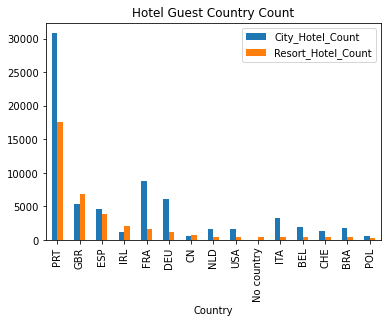

In [150]:
country15.plot(x="Country", y=["City_Hotel_Count",'Resort_Hotel_Count'],kind="bar")
plt.title('Hotel Guest Country Count')

Text(0.5, 1.0, 'Hotel Guest Country Percent')

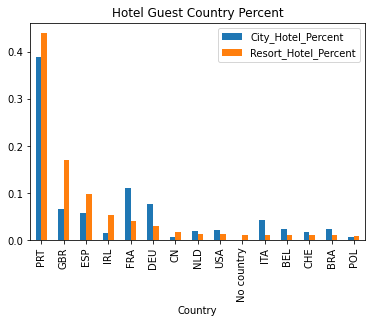

In [151]:
country15.plot(x="Country", y=["City_Hotel_Percent",'Resort_Hotel_Percent'],kind="bar")
plt.title('Hotel Guest Country Percent')

Most guests come from Europe.Compare to City Hotel, there is a larger percentage of guest from Portugal, UK, Spain,Ireland make reservation to Resort Hotel. France,Germany, Italy people prefer City Hotel over Resort Hotel. More guest of Resort Hotel are unwilling to reveal where they come from.

#### How much do guests pay for a room per night?

In [16]:
# Only consider the room price for actual orders
actual_guest = hotel.loc[hotel["is_canceled"] == 0] 
room_prices = hotel[["hotel", "reserved_room_type", "adr"]].sort_values("reserved_room_type")

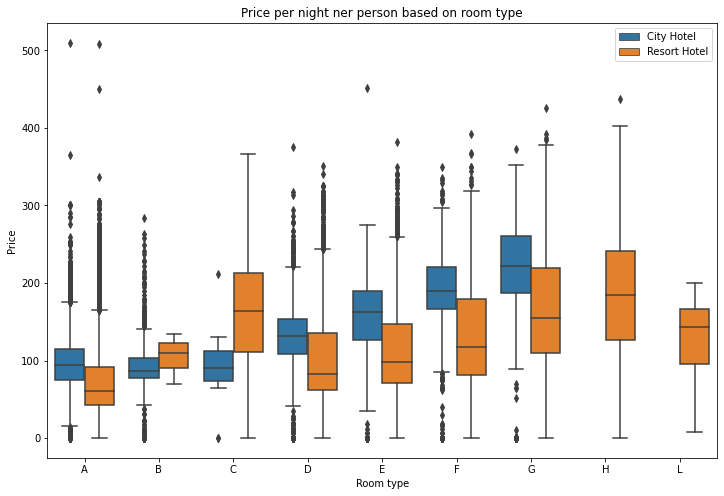

In [24]:
# Make a box plot for price against room type
plt.figure(figsize=(12, 8))
sns.boxplot(x="reserved_room_type",y="adr",hue="hotel",data=room_prices)
plt.title("Price per night ner person based on room type")
plt.xlabel("Room type")
plt.ylabel("Price")
plt.legend(loc="upper right")


Report Hotel has more room type. Most City Hotel charges more than resort hotel. On average, Resort hotel's prices have wider range. 

#### How does the price per night vary over the year?

In [184]:
#calculate price per person
hotel["adr_pp"] = hotel["adr"] / (hotel["adults"] + hotel["children"])
hotel.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_status_date_datetime,arrival_datetime,adr_pp
95749,City Hotel,0,162,2016,August,35,21,2,2,3,...,0,Transient,139.05,1,2,Check-Out,2016-08-25,2016-08-25,2016-08-21,46.35
27562,Resort Hotel,0,130,2016,August,34,20,4,10,2,...,0,Transient,189.86,0,0,Check-Out,2016-09-03,2016-09-03,2016-08-20,94.93
76566,City Hotel,0,138,2015,July,30,25,0,1,2,...,0,Transient-Party,60.00,0,0,Check-Out,2015-07-26,2015-07-26,2015-07-25,30.00
71746,City Hotel,1,229,2017,July,28,12,1,4,2,...,0,Transient,110.00,0,0,Canceled,2016-11-25,2016-11-25,2017-07-12,55.00
26071,Resort Hotel,0,26,2016,July,29,12,2,7,2,...,0,Transient,219.10,0,0,Check-Out,2016-07-21,2016-07-21,2016-07-12,109.55


In [185]:
montly_price = hotel[["hotel", "arrival_date_month", "adr_pp"]].sort_values("arrival_date_month")

In [186]:
month_sorted = ['January','February','March','April','May','June','July','August','September','October','November','December']

In [187]:
# Order by month
montly_price["arrival_date_month"] = pd.Categorical(montly_price["arrival_date_month"], categories=month_sorted, ordered=True)

Text(0, 0.5, 'Price')

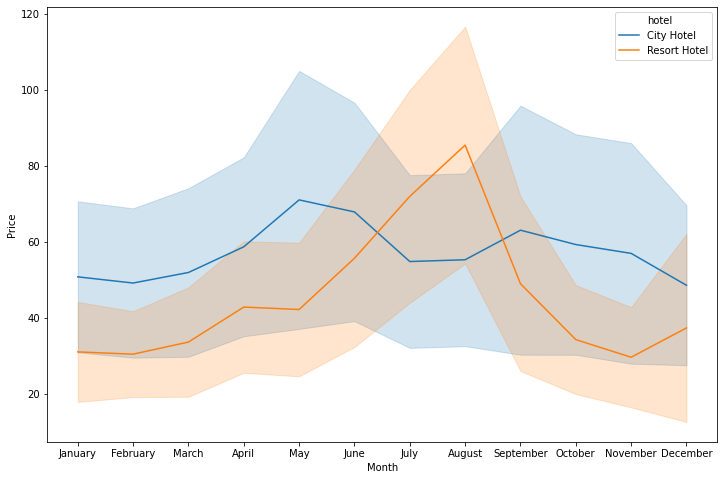

In [188]:
# Make a line plot fot price
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="adr_pp", hue="hotel", data=montly_price, ci="sd")
plt.xlabel("Month")
plt.ylabel("Price")

In Spring and Autumn, the City hotel is a little bit more expensive than summer
In summer time, resort hotel is more expensive, and it is more expensive than city hotel.

#### In which month, do the hotels have the highest room reservation?

Text(0.5, 1.0, 'Guest per month')

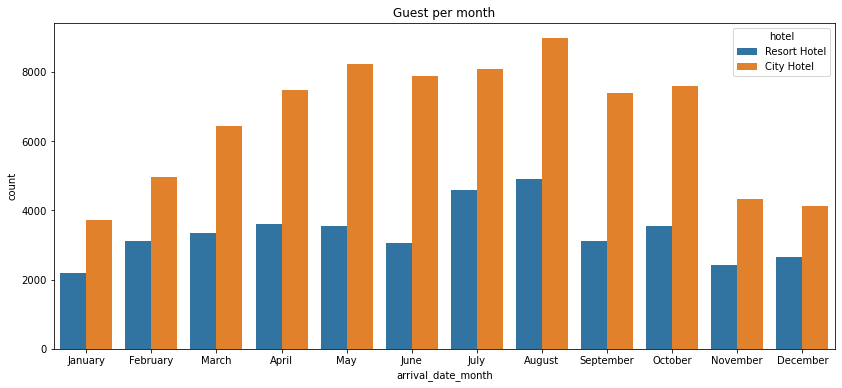

In [174]:
# Use countplot function to plot the reservation numbers over the month
plt.figure(figsize=(14,6))
sns.countplot(x='arrival_date_month',hue = 'hotel',data = hotel, order = month_sorted)
plt.title('Guest per month')

However, notice that the data is from June 2015 to August 2017.So, we have 3 July and August while 2 other months.We need to normalize the data

In [175]:
# Only consider the orders that did not been cancelled
resort_notcanceled = hotel.loc[(hotel["hotel"] == "Resort Hotel") & (hotel["is_canceled"] == 0)]
city_notcanceled = hotel.loc[(hotel["hotel"] == "City Hotel") & (hotel["is_canceled"] == 0)]

In [176]:
resort_number_monthly = resort_notcanceled.groupby("arrival_date_month")["hotel"].count()
city_number_monthly = city_notcanceled.groupby("arrival_date_month")["hotel"].count()

In [177]:
# put all information into a dataframe
monthly_business = pd.DataFrame({'month':resort_number_monthly.index,'resort':resort_number_monthly.values,'city':city_number_monthly.values})
monthly_business

,month,resort,city
0,April,2550,4010
1,August,3257,5367
2,December,2014,2377
3,February,2308,3051
4,January,1866,2249
5,July,3137,4770
6,June,2037,4358
7,March,2570,4049
8,May,2535,4568
9,November,1975,2676


In [178]:
# melt the dataframe into tidy data
monthly_business = pd.melt(monthly_business,id_vars='month',value_name='count',var_name='hotel')
monthly_business

,month,hotel,count
0,April,resort,2550
1,August,resort,3257
2,December,resort,2014
3,February,resort,2308
4,January,resort,1866
5,July,resort,3137
6,June,resort,2037
7,March,resort,2570
8,May,resort,2535
9,November,resort,1975


In [179]:
# Order the data by month
monthly_business["month"] = pd.Categorical(monthly_business["month"], categories=month_sorted,ordered=True)
monthly_business

,month,hotel,count
0,April,resort,2550
1,August,resort,3257
2,December,resort,2014
3,February,resort,2308
4,January,resort,1866
5,July,resort,3137
6,June,resort,2037
7,March,resort,2570
8,May,resort,2535
9,November,resort,1975


In [166]:
# Normalize the data since the count of months are different
monthly_business.loc[(monthly_business["month"] == "July") | (monthly_business["month"] == "August"),"count"] /= 3
monthly_business.loc[~((monthly_business["month"] == "July") | (monthly_business["month"] == "August")),"count"] /= 2

Text(0, 0.5, 'Number of guests')

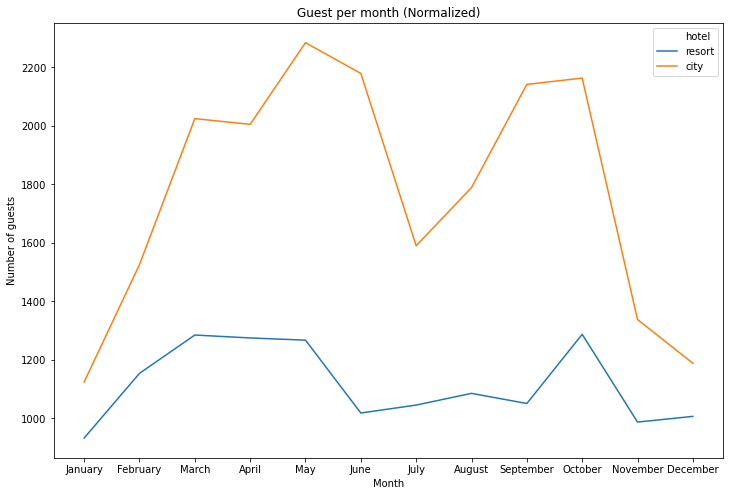

In [175]:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "month", y="count", hue="hotel", data=monthly_business)
plt.title("Guest per month (Normalized)")
plt.xlabel("Month")
plt.ylabel("Number of guests")

The City hotel has more guests during spring and autumn, when the prices are also higher.

The Resort Hotel has slightly less customers from June to September, while the price is higher.

Both hotel has less customers in winter


#### Bookings by market segment

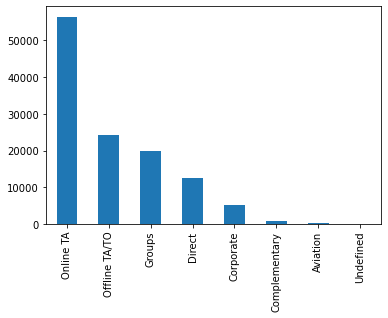

In [107]:
# Make a histgram for the market segment
hotel['market_segment'].value_counts().plot(kind='bar')

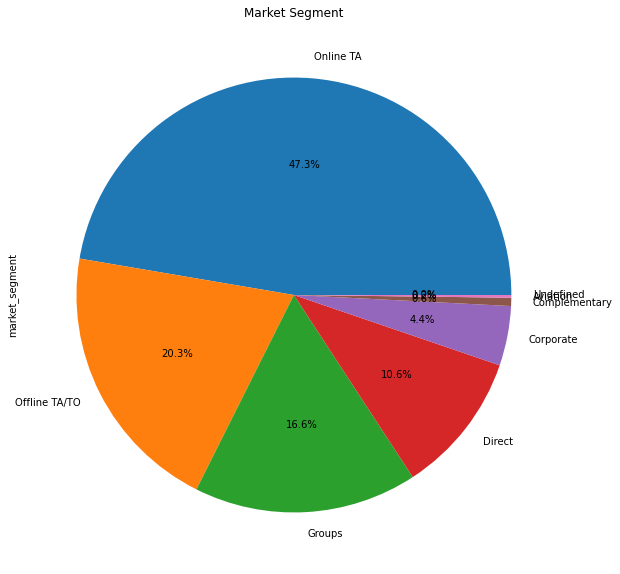

In [108]:
# Make a pie chart fot market segment
Market_pie = hotel['market_segment'].value_counts(normalize=True).plot(kind='pie', figsize=(10,10),autopct='%1.1f%%',title="Market Segment")

More than half of the reservations are made through online and offline travel agency.

#### Which hotel has the higher cancelation rate

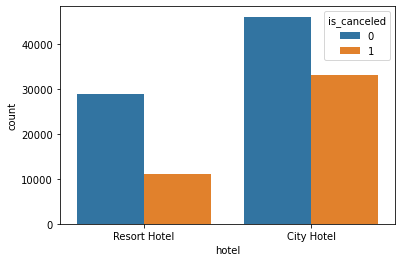

In [109]:
# use countplot to have a overview of the reservation and cancellation
sns.countplot(x='hotel',data=hotel,hue='is_canceled')

In [131]:
hotel_cancel = hotel.groupby('hotel')['is_canceled'].count().to_frame(name='all')
hotel_cancel

,all
hotel,
City Hotel,79162
Resort Hotel,40046


In [132]:
hotel_cancel['canceled']=hotel.groupby('hotel')['is_canceled'].sum().values
hotel_cancel

,all,canceled
hotel,,
City Hotel,79162,33078
Resort Hotel,40046,11120


In [133]:
# Calculate the cancel_rate for each hotel
hotel_cancel['cancel_rate'] = hotel_cancel['canceled']/ hotel_cancel['all']
hotel_cancel

,all,canceled,cancel_rate
hotel,,,
City Hotel,79162,33078,0.417852
Resort Hotel,40046,11120,0.277681


In [135]:
hotel_cancel.reset_index(inplace=True)

In [138]:
hotel_cancel

,hotel,all,canceled,cancel_rate
0,City Hotel,79162,33078,0.417852
1,Resort Hotel,40046,11120,0.277681


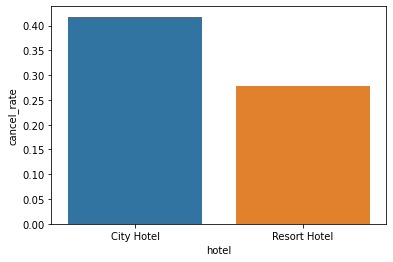

In [137]:
sns.barplot(x = 'hotel',y='cancel_rate',data = hotel_cancel)

City hotel has higher cancellation rate (0.42) than resort hotel (0.28)

#### Which month have the highest number of cancelations?

In [190]:
# Make a set of data for each type of hotels, and group the data by month
book_per_month_resort = hotel.loc[(hotel["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count()
cancel_per_month_resort = hotel.loc[(hotel["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

book_per_month_city = hotel.loc[(hotel["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
cancel_per_month_city = hotel.loc[(hotel["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

In [191]:
# put all the resort information into one dataframe
cancel_resort = pd.DataFrame({"Hotel": "Resort Hotel","Month": list(book_per_month_resort.index),
                              "Count": list(book_per_month_resort.values),
                              "Cancelations": list(cancel_per_month_resort.values)})
cancel_resort

,Hotel,Month,Count,Cancelations
0,Resort Hotel,April,3609,1059
1,Resort Hotel,August,4894,1637
2,Resort Hotel,December,2645,631
3,Resort Hotel,February,3102,794
4,Resort Hotel,January,2191,325
5,Resort Hotel,July,4573,1436
6,Resort Hotel,June,3044,1007
7,Resort Hotel,March,3333,763
8,Resort Hotel,May,3559,1024
9,Resort Hotel,November,2435,460


In [192]:
# put all the city information into one dataframe
cancel_city = pd.DataFrame({"Hotel": "City Hotel","Month": list(book_per_month_city.index),
                              "Count": list(book_per_month_city.values),
                              "Cancelations": list(cancel_per_month_city.values)})
cancel_city

,Hotel,Month,Count,Cancelations
0,City Hotel,April,7469,3459
1,City Hotel,August,8967,3600
2,City Hotel,December,4114,1737
3,City Hotel,February,4950,1899
4,City Hotel,January,3730,1481
5,City Hotel,July,8071,3301
6,City Hotel,June,7885,3527
7,City Hotel,March,6433,2384
8,City Hotel,May,8221,3653
9,City Hotel,November,4336,1660


In [193]:
# Put all the information into one dataframe
cancel = pd.concat([cancel_resort, cancel_city], ignore_index=True)
cancel

,Hotel,Month,Count,Cancelations
0,Resort Hotel,April,3609,1059
1,Resort Hotel,August,4894,1637
2,Resort Hotel,December,2645,631
3,Resort Hotel,February,3102,794
4,Resort Hotel,January,2191,325
5,Resort Hotel,July,4573,1436
6,Resort Hotel,June,3044,1007
7,Resort Hotel,March,3333,763
8,Resort Hotel,May,3559,1024
9,Resort Hotel,November,2435,460


In [194]:
# Calculate the cancel_rate by month
cancel['cancel_rate'] = cancel['Cancelations']/cancel['Count']
cancel

,Hotel,Month,Count,Cancelations,cancel_rate
0,Resort Hotel,April,3609,1059,0.293433
1,Resort Hotel,August,4894,1637,0.334491
2,Resort Hotel,December,2645,631,0.238563
3,Resort Hotel,February,3102,794,0.255964
4,Resort Hotel,January,2191,325,0.148334
5,Resort Hotel,July,4573,1436,0.314017
6,Resort Hotel,June,3044,1007,0.330815
7,Resort Hotel,March,3333,763,0.228923
8,Resort Hotel,May,3559,1024,0.287721
9,Resort Hotel,November,2435,460,0.188912


In [195]:
# Order the data by month
cancel["Month"] = pd.Categorical(cancel["Month"], categories=month_sorted,ordered=True)
cancel

,Hotel,Month,Count,Cancelations,cancel_rate
0,Resort Hotel,April,3609,1059,0.293433
1,Resort Hotel,August,4894,1637,0.334491
2,Resort Hotel,December,2645,631,0.238563
3,Resort Hotel,February,3102,794,0.255964
4,Resort Hotel,January,2191,325,0.148334
5,Resort Hotel,July,4573,1436,0.314017
6,Resort Hotel,June,3044,1007,0.330815
7,Resort Hotel,March,3333,763,0.228923
8,Resort Hotel,May,3559,1024,0.287721
9,Resort Hotel,November,2435,460,0.188912


Text(0.5, 1.0, 'Cancellation Rate vs Month')

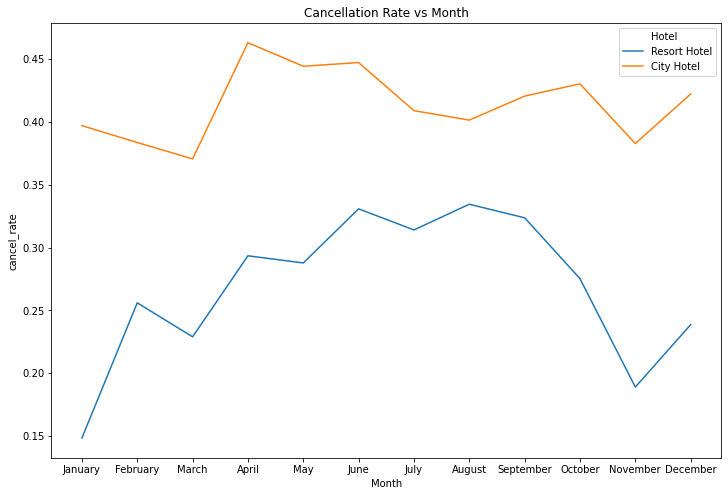

In [197]:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "Month", y = "cancel_rate" , hue="Hotel",data=cancel)
plt.title("Cancellation Rate vs Month")

City Hotel has higher cancellation rate in spring time and lower rate in winter.
Resort hotel has lower cancellation rate in winter and higher rate in summer.